<a href="https://colab.research.google.com/github/dongxiaohuang/Tensorflow2.0_notes/blob/main/tf_keras_regression_wide_deep_multi_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip config set global.index-url https://mirrors.aliyun.com/pypi/simple/
!python -m pip install -U pip
!pip -V
!pip install sklearn pandas

Writing to /root/.config/pip/pip.conf
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 1.5MB 6.5MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
pip 21.0.1 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

import tensorflow as tf

In [4]:
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, tf.keras:
    print(module.__name__, module.__version__)

2.4.1
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.19.5
pandas 1.1.5
sklearn 0.22.2.post1
tensorflow 2.4.1
tensorflow.keras 2.4.0


# Breast cancer data ETL
**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

In [5]:
from sklearn.datasets import load_breast_cancer

demo_data = load_breast_cancer()
print(demo_data.DESCR)
print(demo_data.data.shape)
print(demo_data.target.shape)
demo_data.data[0]

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [6]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    demo_data.data, demo_data.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(319, 30) (319,)
(107, 30) (107,)
(143, 30) (143,)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

# Model Creation (multiple inputs)

## Model Structure
![IMAGE](https://1.bp.blogspot.com/-Dw1mB9am1l8/V3MgtOzp3uI/AAAAAAAABGs/mP-3nZQCjWwdk6qCa5WraSpK8A7rSPj3ACLcB/s1600/image04.png)

## Function API Implementation

In [8]:
# 多输入
tf.random.set_seed(2)

input_wide = tf.keras.layers.Input(shape=[15], name='input_wide')
input_deep = tf.keras.layers.Input(shape=[15], name='input_deep')
hidden1 = tf.keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([input_wide, hidden2])
output = tf.keras.layers.Dense(1, activation='sigmoid')(concat)


model = tf.keras.models.Model(inputs = [input_wide, input_deep],
                         outputs = [output])


In [9]:
# test 
inputs = [np.array([list(range(15))]), np.array([list(range(15))])]

model(inputs)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2.8273863e-07]], dtype=float32)>

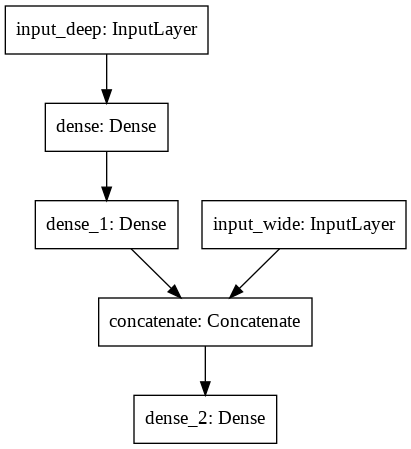

In [10]:
# plot model
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

## Model Subclassing Implementation

In [43]:
tf.random.set_seed(2)
class WideDeepModel(tf.keras.models.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = tf.keras.layers.Dense(30, activation='relu')
    self.hidden2 = tf.keras.layers.Dense(30, activation='relu')
    self.concat = tf.keras.layers.concatenate
    self.dense = tf.keras.layers.Dense(1, activation='sigmoid')
  
  def call(self, inputs):
    input_wide, input_deep = inputs
    output_deep = self.hidden1(input_deep)
    output_deep = self.hidden2(output_deep)
    concat_input = self.concat([input_wide, output_deep])
    output = self.dense(concat_input)
    return output

  def build_graph(self, shapes):
    shape1, shape2 = shapes
    input_wide = tf.keras.layers.Input(shape=shape1)
    input_deep = tf.keras.layers.Input(shape=shape2)
    return tf.keras.models.Model(inputs=[input_wide, input_deep], outputs=[self.call([input_wide, input_deep])])

In [44]:
# test 
# load model
model = WideDeepModel()

# load model by Squential
# model = tf.keras.models.Sequential([WideDeepModel(), ])
# # input_shape = [(None, 15), (None, 15)]
# # model.build(input_shape=(None, 15))
# # model.summary()

inputs = [np.array([list(range(15))]).astype('float32'), np.array([list(range(15))]).astype('float32')]

model(inputs)


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2.8273863e-07]], dtype=float32)>

In [36]:
model.summary()

Model: "wide_deep_model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             multiple                  480       
_________________________________________________________________
dense_19 (Dense)             multiple                  930       
_________________________________________________________________
dense_20 (Dense)             multiple                  46        
Total params: 1,456
Trainable params: 1,456
Non-trainable params: 0
_________________________________________________________________


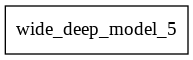

In [37]:
# plot model
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

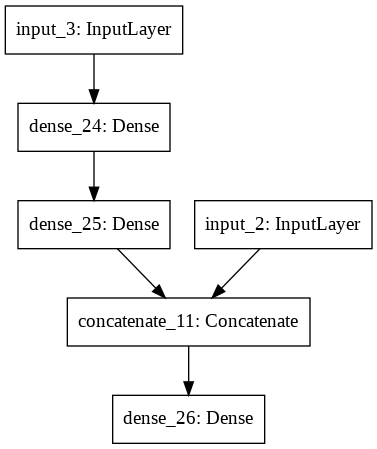

In [45]:
# plot model
tf.keras.utils.plot_model(
    model.build_graph([(15), (15)]),
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

## Train and test


### compile

In [16]:
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)
]

Model: "wide_deep_model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              multiple                  480       
_________________________________________________________________
dense_10 (Dense)             multiple                  930       
_________________________________________________________________
dense_11 (Dense)             multiple                  46        
Total params: 1,456
Trainable params: 1,456
Non-trainable params: 0
_________________________________________________________________


### fit

In [17]:
x_train_scaled_wide = x_train_scaled[:, :15]
x_train_scaled_deep = x_train_scaled[:, 15:]
x_valid_scaled_wide = x_valid_scaled[:, :15]
x_valid_scaled_deep = x_valid_scaled[:, 15:]
x_test_scaled_wide = x_test_scaled[:, :15]
x_test_scaled_deep = x_test_scaled[:, 15:]


history = model.fit([x_train_scaled_wide, x_train_scaled_deep], y_train,
                   validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], y_valid),
                   epochs=100,
                   callbacks=callbacks)

Epoch 1/100
10/10 [==============================] - 1s 43ms/step - loss: 0.8061 - accuracy: 0.3532 - val_loss: 0.6654 - val_accuracy: 0.6355
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6005 - accuracy: 0.6841 - val_loss: 0.5431 - val_accuracy: 0.8598
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4580 - accuracy: 0.8995 - val_loss: 0.4432 - val_accuracy: 0.9159
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3782 - accuracy: 0.9255 - val_loss: 0.3656 - val_accuracy: 0.9159
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2975 - accuracy: 0.9356 - val_loss: 0.2982 - val_accuracy: 0.9346
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2505 - accuracy: 0.9463 - val_loss: 0.2505 - val_accuracy: 0.9439
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2084 - accuracy: 0.9442 - val_loss: 0.2145 - val_accuracy: 0.9346
Epoch 8/100


### evaluate

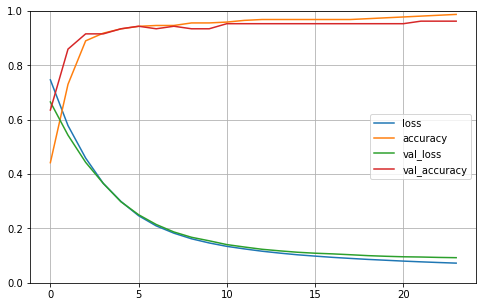

In [18]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [19]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.0916 - accuracy: 0.9720


[0.09160234779119492, 0.9720279574394226]

# Model Creatition (multiple outputs)

## Function API Implementation

In [20]:
# 多输入, 多输出
tf.random.set_seed(2)

input_wide = tf.keras.layers.Input(shape=[15], name='input_wide')
input_deep = tf.keras.layers.Input(shape=[15], name='input_deep')
hidden1 = tf.keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([input_wide, hidden2])
output1 = tf.keras.layers.Dense(1, activation='sigmoid', name='output_1')(concat)
output2 = tf.keras.layers.Dense(1, activation='sigmoid', name='output_2')(concat)

model = tf.keras.models.Model(inputs = [input_wide, input_deep],
                         outputs = [output1, output2])



In [21]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_deep (InputLayer)         [(None, 15)]         0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           480         input_deep[0][0]                 
__________________________________________________________________________________________________
input_wide (InputLayer)         [(None, 15)]         0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 30)           930         dense_12[0][0]                   
____________________________________________________________________________________________

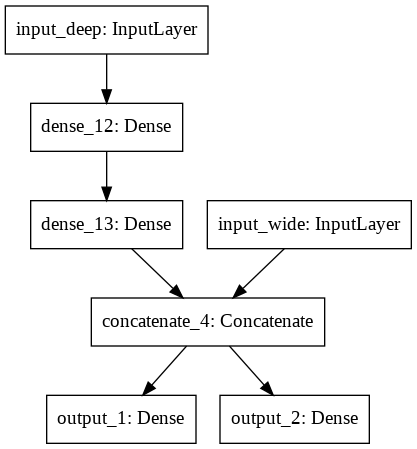

In [22]:
tf.keras.utils.plot_model(model, show_layer_names=True)

In [23]:
# test 
inputs = [np.array([list(range(15))]), np.array([list(range(15))])]

model(inputs)

[<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2.8273863e-07]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.01569781]], dtype=float32)>]

## Model Subclassing Implementation

In [24]:
tf.random.set_seed(2)
class WideDeepModel(tf.keras.models.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = tf.keras.layers.Dense(30, activation='relu')
    self.hidden2 = tf.keras.layers.Dense(30, activation='relu')
    self.concat = tf.keras.layers.concatenate
    self.dense1 = tf.keras.layers.Dense(1, activation='sigmoid', name='output_1')
    self.dense2 = tf.keras.layers.Dense(1, activation='sigmoid', name='output_2')
  
  def call(self, inputs):
    input_wide, input_deep = inputs
    output_deep = self.hidden1(input_deep)
    output_deep = self.hidden2(output_deep)
    concat_input = self.concat([input_wide, output_deep])
    output1 = self.dense1(concat_input)
    output2 = self.dense2(concat_input)
    return [output1, output2]
  
  def build_graph(self, shapes):
    x_wide_shape, x_deep_shape = shapes
    input_wide = tf.keras.layers.Input(shape=[15], name='input_wide')
    input_deep = tf.keras.layers.Input(shape=[15], name='input_deep')
    inputs = [input_wide, input_deep]
    return tf.keras.models.Model(inputs=inputs, outputs=self.call(inputs))

In [48]:
model.build_graph([(15,), (15,)]).summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 30)           480         input_5[0][0]                    
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 30)           930         dense_24[1][0]                   
____________________________________________________________________________________________

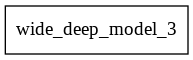

In [25]:
model = WideDeepModel()
tf.keras.utils.plot_model(model)

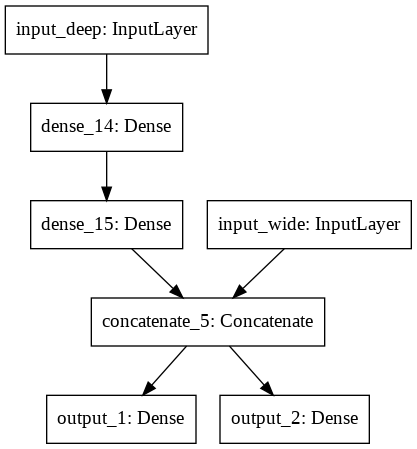

In [26]:
tf.keras.utils.plot_model(model.build_graph([(15,), (15,)]))

In [27]:
# test 
inputs = [np.array([list(range(15))]).astype('float32'), np.array([list(range(15))]).astype('float32')]

model(inputs)

[<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2.8273863e-07]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.01569781]], dtype=float32)>]

## Train and test

### compile

##### same loss

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)
]

##### different losses

In [29]:
## specific loss and loss weights
losses = {
	"output_1": "binary_crossentropy",
	"output_2": "binary_crossentropy",
}
loss_weights = {"output_1": 1.0, "output_2": 2}
model.compile(loss=losses, loss_weights=loss_weights, metrics=['accuracy'])

### train

In [30]:
x_train_scaled_wide = x_train_scaled[:, :15]
x_train_scaled_deep = x_train_scaled[:, 15:]
x_valid_scaled_wide = x_valid_scaled[:, :15]
x_valid_scaled_deep = x_valid_scaled[:, 15:]
x_test_scaled_wide = x_test_scaled[:, :15]
x_test_scaled_deep = x_test_scaled[:, 15:]


history = model.fit([x_train_scaled_wide, x_train_scaled_deep], y_train,
                   validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], y_valid),
                   epochs=100,
                   callbacks=callbacks)

Epoch 1/100
10/10 [==============================] - 1s 30ms/step - loss: 1.4511 - output_1_loss: 0.5182 - output_2_loss: 0.4664 - output_1_accuracy: 0.7730 - output_2_accuracy: 0.8381 - val_loss: 1.3160 - val_output_1_loss: 0.4553 - val_output_2_loss: 0.4303 - val_output_1_accuracy: 0.8224 - val_output_2_accuracy: 0.8505
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 1.1482 - output_1_loss: 0.3904 - output_2_loss: 0.3789 - output_1_accuracy: 0.9142 - output_2_accuracy: 0.9002 - val_loss: 1.1389 - val_output_1_loss: 0.3967 - val_output_2_loss: 0.3711 - val_output_1_accuracy: 0.8692 - val_output_2_accuracy: 0.8598
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.9179 - output_1_loss: 0.3238 - output_2_loss: 0.2971 - output_1_accuracy: 0.9411 - output_2_accuracy: 0.9297 - val_loss: 0.9916 - val_output_1_loss: 0.3456 - val_output_2_loss: 0.3230 - val_output_1_accuracy: 0.8785 - val_output_2_accuracy: 0.8879
Epoch 4/100
10/10 [===========

### evaluation

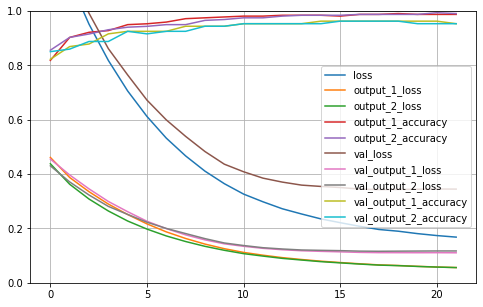

In [49]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [32]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.2223 - output_1_loss: 0.0675 - output_2_loss: 0.0774 - output_1_accuracy: 0.9790 - output_2_accuracy: 0.9720


[0.22231410443782806,
 0.06749054789543152,
 0.07741177827119827,
 0.9790209531784058,
 0.9720279574394226]